<a href="https://colab.research.google.com/github/sachinmotwani20/SP_Python/blob/master/Ch2%2C1Aliasing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Waveforms and Harmonics
[Note : Must go through the last question of this link -> https://github.com/AllenDowney/ThinkDSP/blob/master/code/chap02soln.ipynb ]

In [0]:
!pip install thinkx

In [0]:
from __future__ import print_function, division

%matplotlib inline

import thinkdsp 
import thinkplot

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from IPython.display import display

#Triangular Signal
Create a triangle signal & plot a 3 period segment.

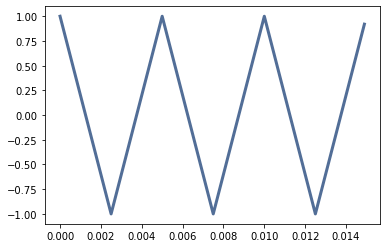

In [0]:
signal = thinkdsp.TriangleSignal(200)
duration = signal.period*3
segment = signal.make_wave(duration, framerate = 10000)
segment.plot()

Make a wave and play with it.

In [0]:
wave = signal.make_wave(duration = 0.5, framerate = 10000)
wave.apodize()
wave.make_audio()

Compute its spectrum & plot it.

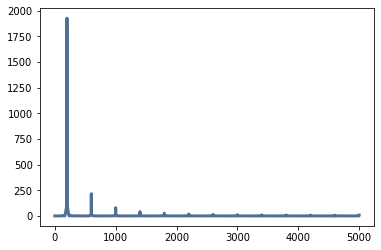

In [0]:
spectrum = wave.make_spectrum()
spectrum.plot()

#Square Signal
Make a square signal & plot a 3 period segment.

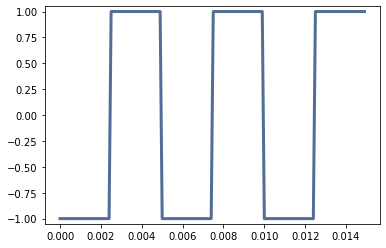

In [0]:
signal = thinkdsp.SquareSignal(200)
duration = signal.period*3
segment = signal.make_wave(duration, framerate = 10000)
segment.plot()
thinkplot.config(ylim=[-1.05, 1.05], legend = False)

Make a wave and play with it.

In [0]:
wave = signal.make_wave(duration = 0.5, framerate = 10000)
wave.apodize()
wave.make_audio()

Compute its spectrum & plot it.

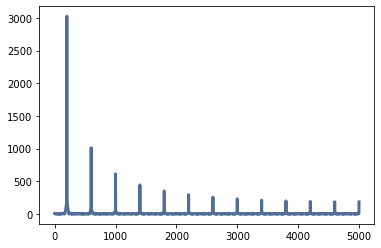

In [0]:
spectrum = wave.make_spectrum()
spectrum.plot()

#Sawtooth Signal

Make a sawtooth signal & plot a 3 period segment.

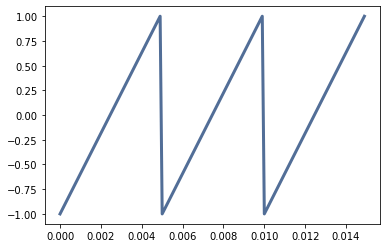

In [0]:
signal = thinkdsp.SawtoothSignal(200)
duration = signal.period*3
segment = signal.make_wave(duration, framerate = 10000)
segment.plot()

Make a wave & play with it.

In [0]:
wave = signal.make_wave(duration=0.5, framerate = 10000)
wave.apodize()
wave.make_audio()

Computer its spectrum & plot it.

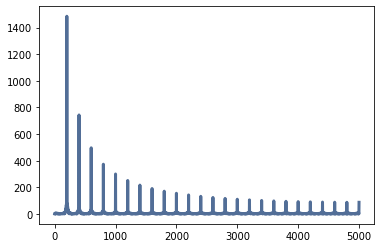

In [0]:
spectrum =  wave.make_spectrum()
spectrum.plot()

![Exercise](https://drive.google.com/file/d/1DPz7k0xJQWUal4xRog8_TJ-S3TyaHOIE/view?usp=drivesdk] )

#Aliasing 
*   ***Signal*** is continuous in time.
*   ***Wave*** is a sequence of discrete samples.

We lose info when we sample.

If the sample rate is 10000 Hz, the highest we can measure is 5000 Hz. 

What happens to frequencies above the 'folding frequency'?
Note: Since we having two names for the same thing, hence the name 'Alias'. eg, in 10000 Hz, 5500 is alias to 4500 [getting folded -> same samples]. 
Similarly, 9000 Hz will fold back to 1000 Hz.
10000 Hz will fold back to zero Hz.
Also, 10001 Hz will fold back to -1 frequency; which will in turn fold back to +1. And so on & so forth.

![Folding](https://drive.google.com/file/d/1DU5OfaKhyGHRrkdXjPoPj-CEntbzU-Ka/view?usp=drivesdk)

Make a cosine signal at 4500 Hz, make a wave at framerate 10 kHz, and plot 5 periods.

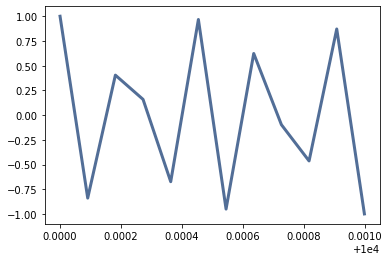

In [0]:
framerate = 10000

signal = thinkdsp.CosSignal(4500)
duration = signal.period*5
segment =  signal.make_wave(duration, framerate)
segment.plot()

Make a cosine signal at 5500 Hz, make a wave at framerate 10 kHz, and plot the same duration.

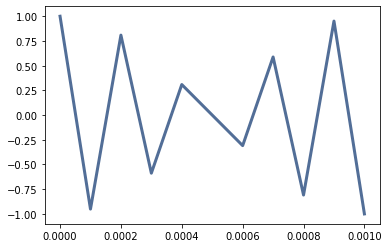

In [0]:
signal = thinkdsp.CosSignal(5500)
segment = signal.make_wave(duration, framerate=framerate)
segment.plot()

Note that, with framerate 10 kHz, the folding frequency is 5 kHz, so a 4500 Hz signal and a 5500 Hz signal look exactly the same.

![Aliasing](https://drive.google.com/file/d/1DQkpXmxHMQOb3NHme9cpdo4Chx0Uq-Ll/view?usp=drivesdk)

Make a triangle signal and plot the spectrum. See how the harmonics get folded.

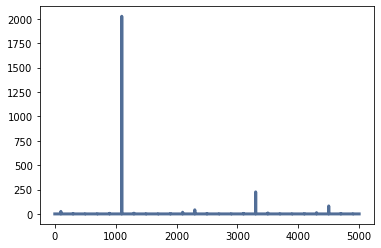

In [0]:
signal = thinkdsp.TriangleSignal(1100)
segment = signal.make_wave(duration=0.5, framerate=10000)
spectrum = segment.make_spectrum()
spectrum.plot()


#Aliasing interaction

The following interaction explores the effect of aliasing on the harmonics of a sawtooth signal.

In [0]:
def view_harmonics(freq, framerate):
    signal = thinkdsp.SawtoothSignal(freq)
    wave = signal.make_wave(duration=0.5, framerate=framerate)
    spectrum = wave.make_spectrum()
    spectrum.plot(color='blue')
    thinkplot.show(xlabel='frequency', ylabel='amplitude')
    
    display(wave.make_audio())

In [0]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

slider1 = widgets.FloatSlider(min=100, max=10000, value=100, step=100)
slider2 = widgets.FloatSlider(min=5000, max=40000, value=10000, step=1000)
interact(view_harmonics, freq=slider1, framerate=slider2);

interactive(children=(FloatSlider(value=100.0, description='freq', max=10000.0, min=100.0, step=100.0), FloatS…

You may play around these frequencies to. 
Set framerate to 10000.
If you set frequency as a multiple of framerate, say 1000 Hz, it will sound smooth. Else, say 800 Hz, it will have unnecessary frequency components & will sound noisy.